<a href="https://colab.research.google.com/github/Sakshamsinha23/Machine-Learning/blob/main/Ensemble_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install pyforest

  Preparing metadata (setup.py) ... done
  Created wheel for pyforest: filename=pyforest-1.1.2-py2.py3-none-any.whl size=15897 sha256=d41c463c035c3557a953b045f8c1ffe8af853c23fec137cdf9c534494eb521e8
  Stored in directory: /root/.cache/pip/wheels/c5/ca/73/5cdc3d087111bfbdef90be5457aa03c00c0e32241b2752445c
Successfully built pyforest


In [4]:
import pyforest
from sklearn.datasets import make_moons

In [26]:
x,y=make_moons(n_samples=1000,noise=0.2)

In [27]:
df={'x1':x[:,0], 'x2':x[:,1], 'y':y}

In [28]:
data=pd.DataFrame(df)

<IPython.core.display.Javascript object>

In [29]:
data

,x1,x2,y
0,-1.204849,0.066926,0
1,1.724448,-0.123918,1
2,1.638166,0.261317,1
3,1.146011,0.330153,0
4,1.850584,0.084668,1
...,...,...,...
995,2.058636,0.034497,1
996,1.089135,-0.403781,1
997,0.906463,0.313828,0
998,-0.077219,0.434265,1


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

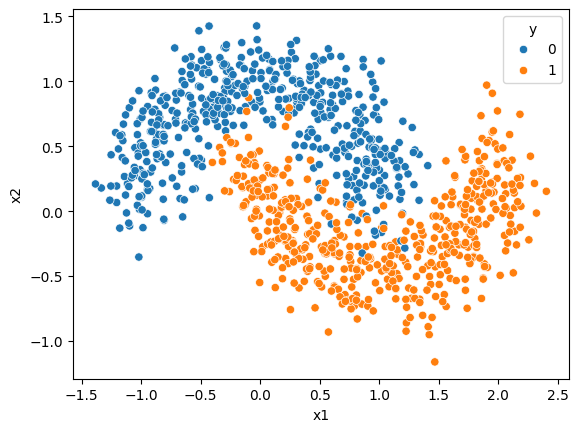

In [30]:
sns.scatterplot(x='x1',y='x2',hue='y',data=data)
plt.show()

In [33]:
x_a=data.iloc[:,:-1]
y_a=data['y']

In [35]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_a,y_a,test_size=0.2,random_state=42)

In [38]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB


In [39]:
dt=DecisionTreeClassifier()
dt.fit(x_train,y_train)
dt.score(x_train,y_train)*100,dt.score(x_test,y_test)*100

(100.0, 95.0)

In [40]:
sv=SVC()
sv.fit(x_train,y_train)
sv.score(x_train,y_train)*100,sv.score(x_test,y_test)*100

(97.125, 95.0)

In [48]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
gnb.score(x_train,y_train)*100,gnb.score(x_test,y_test)*100

(86.25, 86.0)

In [49]:
from sklearn.ensemble import VotingClassifier


In [53]:
l=[('dt1',DecisionTreeClassifier()),('svc1',SVC()),('gnb1',GaussianNB())]

vc=VotingClassifier(l)
vc.fit(x_train,y_train)


VotingClassifier(estimators=[('dt1', DecisionTreeClassifier()), ('svc1', SVC()),
                             ('gnb1', GaussianNB())])

In [56]:
vc.score(x_train,y_train)*100,vc.score(x_test,y_test)*100

(97.75, 95.5)

In [57]:
# check

In [59]:
pred={'dt':dt.predict(x_test),'svc':sv.predict(x_test),'gnb':gnb.predict(x_test),'vc':vc.predict(x_test)}

In [60]:
pd.DataFrame(pred)

<IPython.core.display.Javascript object>

,dt,svc,gnb,vc
0,0,1,1,1
1,0,0,1,0
2,0,0,0,0
3,1,1,1,1
4,1,1,1,1
...,...,...,...,...
195,1,1,1,1
196,1,1,1,1
197,1,1,1,1
198,1,1,1,1
